In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error


In [2]:
CENTRE = 13000
STD    = 10000
NUM_SAMPLES = 400_000

# Target

count    400000.000000
mean      13893.069861
std        8669.793556
min           0.080486
25%        6970.197669
50%       13099.055768
75%       19720.156534
max       57894.994971
dtype: float64


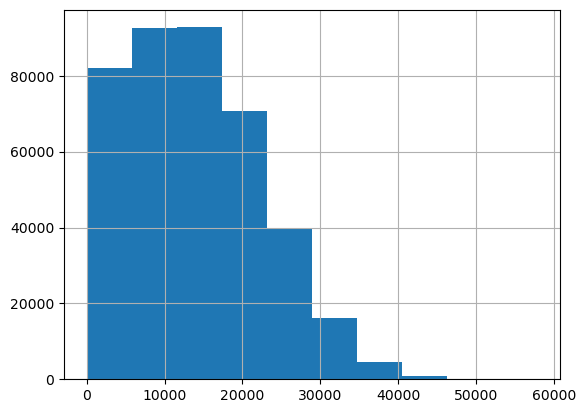

In [3]:
target = pd.Series(np.abs(np.random.normal(CENTRE, STD, NUM_SAMPLES))) # generate positive values
print(target.describe())
target.hist();

# Predict median

In [4]:
preds = pd.Series([target.median()]*target.shape[0])
preds.describe().round(1)

count    400000.0
mean      13099.1
std           0.0
min       13099.1
25%       13099.1
50%       13099.1
75%       13099.1
max       13099.1
dtype: float64

# MAPE test

In [5]:
def test(NUM_TO_EDIT):
    NUM_SAMPLES
    _target = target.copy()
    
    print('\nBefore:')
    print('Values <10 count', _target[_target<10].count())
    print('Values <10 fraction', round(_target[_target<10].count()/_target.shape[0]*100, 3), '%')
    
    MAPE_test = []
    for i in range(1,10):
        # edit first value in target dataset
        _target.iloc[:NUM_TO_EDIT] = i
        MAPE_test += [mean_absolute_percentage_error(_target, preds)]

    print('\nAfter:')
    print('Values <10 count', _target[_target<10].count())
    print('Values <10 fraction', round(_target[_target<10].count()/_target.shape[0]*100, 3), '%\n')

    MAPE_test = pd.Series(MAPE_test, index=range(1,10))  
    MAPE_test.plot()
    plt.xlabel('Edited value of first target')
    plt.ylabel('MAPE')
    plt.show()
    
    print(MAPE_test.describe().round(3))
    print('\nRatio MAPE max/min', round(MAPE_test.max()/MAPE_test.min(), 3),
          '\nfor NUM_TO_EDIT =', NUM_TO_EDIT,
          '\nit\'s', round(NUM_TO_EDIT/NUM_SAMPLES*100, 3), '% of total samples count'
         )



Before:
Values <10 count 152
Values <10 fraction 0.038 %

After:
Values <10 count 4150
Values <10 fraction 1.038 %



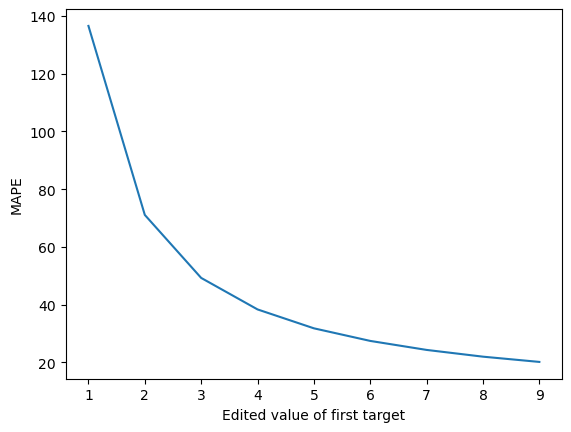

count      9.000
mean      46.770
std       37.354
min       20.150
25%       24.308
50%       31.794
75%       49.259
max      136.586
dtype: float64

Ratio MAPE max/min 6.778 
for NUM_TO_EDIT = 4000 
it's 1.0 % of total samples count


In [6]:
test(4000)